# Zestaw zadań: Metoda najmniejszych kwadratów
## Zadanie 1
### Autor: Artur Gęsiarz

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

### Importowanie danych do testowania

In [100]:
# pozyskiwanie nazw kolumn
column_names = []
with open("/Users/arturgesiarz/Desktop/MOwNiT/materialy/lab02/dataset/breast-cancer.labels") as f:
    for line in f:
        column_names.append(line.strip())

In [101]:
# pozyskianie pierwszego zestawu danych
train_data = pd.io.parsers.read_csv("/Users/arturgesiarz/Desktop/MOwNiT/materialy/lab02/dataset/breast-cancer-train.dat", names=column_names)
train_data

,patient ID,Malignant/Benign,radius (mean),texture (mean),perimeter (mean),area (mean),smoothness (mean),compactness (mean),concavity (mean),concave points (mean),...,radius (worst),texture (worst),perimeter (worst),area (worst),smoothness (worst),compactness (worst),concavity (worst),concave points (worst),symmetry (worst),fractal dimension (worst)
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,891923,B,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,...,14.67,16.93,94.17,661.1,0.11700,0.10720,0.03732,0.05802,0.2823,0.06794
296,891936,B,10.91,12.35,69.14,363.7,0.08518,0.04721,0.01236,0.01369,...,11.37,14.82,72.42,392.2,0.09312,0.07506,0.02884,0.03194,0.2143,0.06643
297,892189,M,11.76,18.14,75.00,431.1,0.09968,0.05914,0.02685,0.03515,...,13.36,23.39,85.10,553.6,0.11370,0.07974,0.06120,0.07160,0.1978,0.06915
298,892214,B,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,...,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676


In [102]:
# pozyskianie pierwszego zestawu danych
validate_data = pd.io.parsers.read_csv("/Users/arturgesiarz/Desktop/MOwNiT/materialy/lab02/dataset/breast-cancer-validate.dat", names=column_names)
validate_data

,patient ID,Malignant/Benign,radius (mean),texture (mean),perimeter (mean),area (mean),smoothness (mean),compactness (mean),concavity (mean),concave points (mean),...,radius (worst),texture (worst),perimeter (worst),area (worst),smoothness (worst),compactness (worst),concavity (worst),concave points (worst),symmetry (worst),fractal dimension (worst)
0,892438,M,19.530,18.90,129.50,1217.0,0.11500,0.16420,0.219700,0.10620,...,25.93,26.24,171.10,2053.0,0.1495,0.41160,0.61210,0.19800,0.2968,0.09929
1,892604,B,12.460,19.89,80.43,471.3,0.08451,0.10140,0.068300,0.03099,...,13.46,23.07,88.13,551.3,0.1050,0.21580,0.19040,0.07625,0.2685,0.07764
2,89263202,M,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.228300,0.12800,...,23.68,29.43,158.80,1696.0,0.1347,0.33910,0.49320,0.19230,0.3294,0.09469
3,892657,B,10.490,18.61,66.86,334.3,0.10680,0.06678,0.022970,0.01780,...,11.06,24.54,70.76,375.4,0.1413,0.10440,0.08423,0.06528,0.2213,0.07842
4,89296,B,11.460,18.16,73.59,403.1,0.08853,0.07694,0.033440,0.01502,...,12.68,21.61,82.69,489.8,0.1144,0.17890,0.12260,0.05509,0.2208,0.07638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,924934,B,10.290,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,...,10.84,34.91,69.57,357.6,0.1384,0.17100,0.20000,0.09127,0.2226,0.08283
256,924964,B,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.65,22.88,67.88,347.3,0.1265,0.12000,0.01005,0.02232,0.2262,0.06742
257,925236,B,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.00000,...,10.49,34.24,66.50,330.6,0.1073,0.07158,0.00000,0.00000,0.2475,0.06969
258,925277,B,14.590,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.48,27.27,105.90,733.5,0.1026,0.31710,0.36620,0.11050,0.2258,0.08004


### Histogram charakterystyki promienia

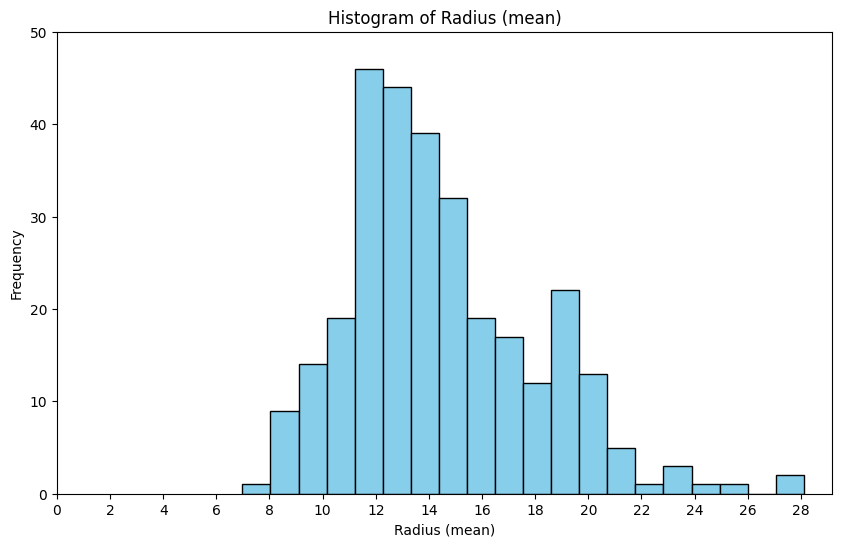

In [103]:
plt.figure(figsize=(10, 6))
plt.hist(train_data['radius (mean)'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Radius (mean)')
plt.ylabel('Frequency')
plt.xticks(range(0, 30, 2))
plt.yticks(range(0, 60, 10))
plt.title('Histogram of Radius (mean)')
plt.show()

### Wykres charakterystyki promienia

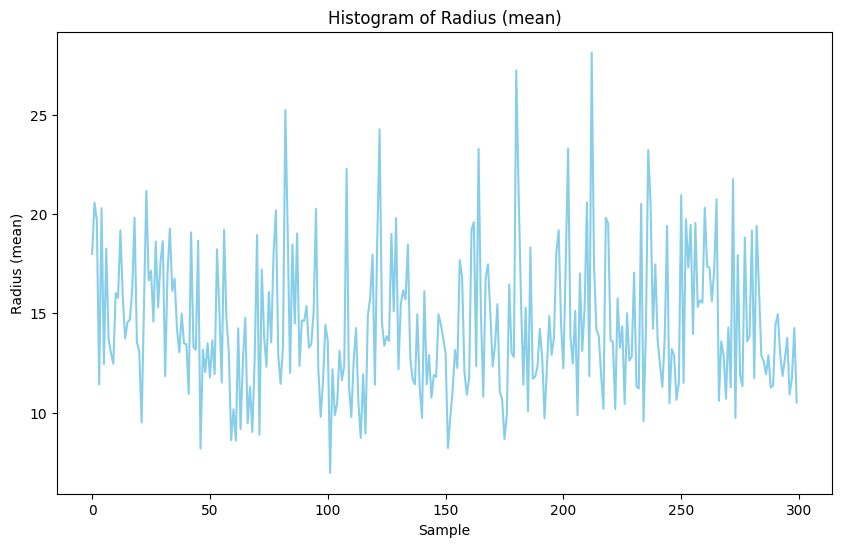

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(train_data['radius (mean)'], color='skyblue')
plt.xlabel('Sample')
plt.ylabel('Radius (mean)')
plt.title('Line chart of Radius (mean)')
plt.show()